In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from matplotlib import cm
import math
import matplotlib.gridspec as gridspec

In [92]:
# Define theta and phi values
theta = np.linspace(0, np.pi, 500)
phi = np.linspace(0, 2 * np.pi, 500)
theta, phi = np.meshgrid(theta, phi)

def sph_to_cart(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z


In [53]:
def rotate_coordinates(x, y, z, rotation_matrix):
    coords = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    rotated_coords = rotation_matrix @ coords
    x_rot = rotated_coords[0, :].reshape(x.shape)
    y_rot = rotated_coords[1, :].reshape(y.shape)
    z_rot = rotated_coords[2, :].reshape(z.shape)
    return x_rot, y_rot, z_rot

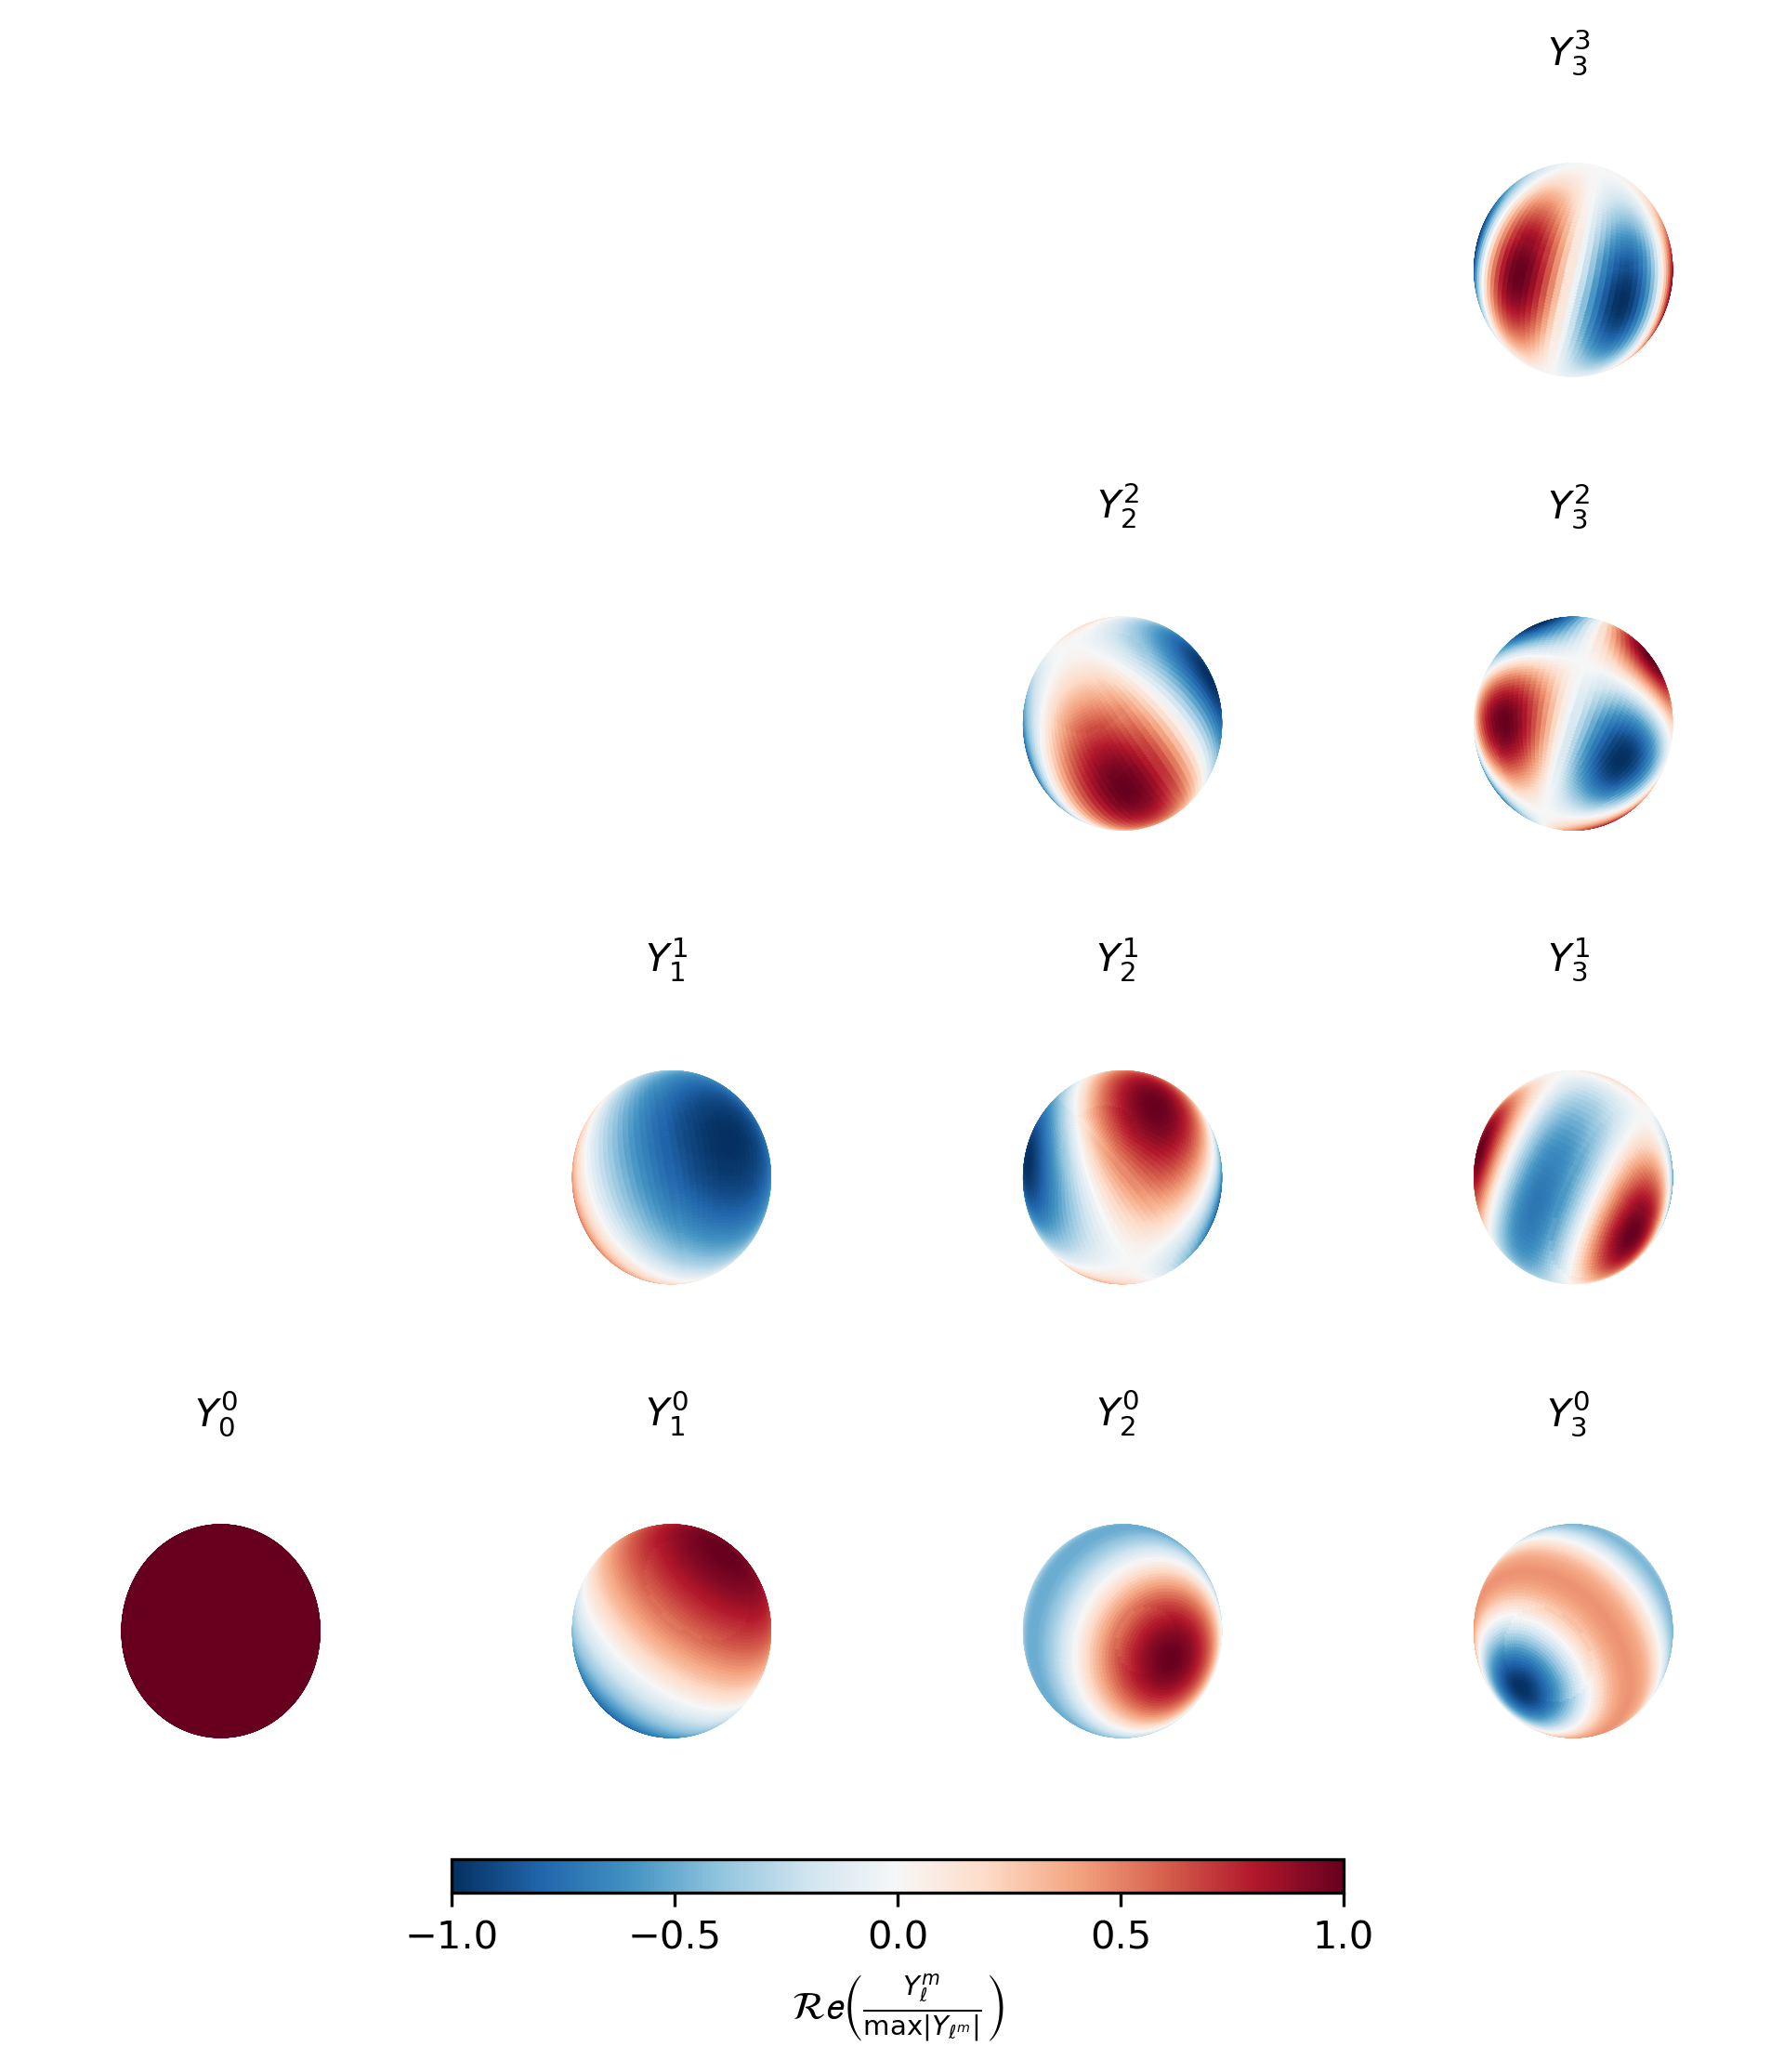

In [98]:
display_inverse = False

max_l = 3

np.random.seed(0)

# Create a figure
fig = plt.figure(figsize=(8, 8), dpi=300)
# Create a GridSpec with variable number of columns per row
gs = gridspec.GridSpec(max_l + 1, max_l + 1)

# Initialize the color normalization for the colorbar
norm = plt.Normalize(vmin=-1, vmax=1)
cmap = cm.RdBu_r

for l in range(max_l + 1):
    for m in range(0, l + 1):  # Only non-negative m
        # Position in the grid: row and column indices
        row = max_l - m
        col = l if not display_inverse else max_l - l

        # Compute the spherical harmonic Y_l^m(theta, phi)
        Y_lm = sph_harm(m if not display_inverse else -m, l, phi, theta)
        # Take the real part for visualization
        Y_lm_real = np.real(Y_lm)

        # Normalize the spherical harmonic values for color mapping
        Y_lm_norm = Y_lm_real / np.max(np.abs(Y_lm_real))

        # Cartesian coordinates of the sphere
        x, y, z = sph_to_cart(theta, phi)

        # Generate random rotation angles
        alpha = np.random.uniform(0, 2 * np.pi)  # Rotation around x-axis
        beta = np.random.uniform(0, 2 * np.pi)   # Rotation around y-axis
        gamma = np.random.uniform(0, 2 * np.pi)  # Rotation around z-axis

        # Rotation matrices around x, y, z axes
        R_x = np.array([[1, 0, 0],
                        [0, np.cos(alpha), -np.sin(alpha)],
                        [0, np.sin(alpha), np.cos(alpha)]])
        R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                        [0, 1, 0],
                        [-np.sin(beta), 0, np.cos(beta)]])
        R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                        [np.sin(gamma), np.cos(gamma), 0],
                        [0, 0, 1]])

        # Combined rotation matrix
        rotation_matrix = R_z @ R_y @ R_x

        # Apply rotation to coordinates
        x_rot, y_rot, z_rot = rotate_coordinates(x, y, z, rotation_matrix)

        # Add subplot at the specified grid location
        ax = fig.add_subplot(gs[row, col], projection='3d')

        # Plot the surface with color mapping based on Y_lm values
        surf = ax.plot_surface(
            x_rot, y_rot, z_rot, facecolors=cmap((Y_lm_norm + 1) / 2),
            rstride=5, cstride=5, antialiased=True, shade=False
        )
        # Remove axis for better visualization
        ax.set_axis_off()
        ax.set_title(f'$Y_{{{l}}}^{{{m if not display_inverse else -m}}}$', fontsize=10)
        # Set aspect ratio to be equal
        ax.set_box_aspect([1, 1, 1])

# Add a colorbar below the entire figure
fig.subplots_adjust(bottom=0.1)  # Adjust the layout to make space for colorbar
cbar_ax = fig.add_axes([0.315, 0.07, 0.4, 0.015]) # Position of the colorbar
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', shrink=0.3, aspect=1)
cbar.set_label(r'$\mathcal{Re}\left(\frac{Y_\ell^m}{\max |Y_{\ell^m}|}\right)$', loc='center')

plt.savefig(f'spherical_harmonics_m_{"positive" if not display_inverse else "negative"}.pdf')
plt.show()